In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the AutoInsurance data

AI = pd.read_csv("D:\Capstone Internship project\AutoInsurance.csv", header=0)

# Copy to back-up file

AI_bk = AI.copy()

# Display first 5 values

AI.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Copy the file to back
AI_bk2 = AI.copy()

# Display first 5 records

AI.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
AI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#Find the duplicates

AI.duplicated().sum()

0

In [6]:
# Count the missing values by each variable, if available

AI.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
#Create labels for the data

bin_labels = [0,1,2]

AI['claim_target'] = pd.cut(AI['Total Claim Amount'], bins=(-1,1000,2000,3000),labels=bin_labels)
AI['claim_target'].value_counts()

0    8731
1     384
2      19
Name: claim_target, dtype: int64

In [8]:
Target_count = AI['claim_target'].value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Class 2:', Target_count[2])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Proportion:', round(Target_count[0] / Target_count[2], 2), ': 2')


Class 0: 8731
Class 1: 384
Class 2: 19
Proportion: 22.74 : 1
Proportion: 459.53 : 2


In [9]:
#random oversampling

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define dataset

X, y = make_classification(n_samples=len(AI), weights=[0.99], flip_y=0)

# summarize class distribution

print(Counter(y))

# define oversampling strategy

oversample = RandomOverSampler(sampling_strategy=0.1)

# fit and apply the transform

X_over, y_over = oversample.fit_resample(X, y)

# summarize class distribution

print(Counter(y_over))

Counter({0: 9043, 1: 91})
Counter({0: 9043, 1: 904})


In [10]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

AI['Customer Lifetime Value	'] = LE.fit_transform(AI['Customer Lifetime Value'])
AI['Income'] = LE.fit_transform(AI['Income'])
AI['Monthly Premium Auto'] = LE.fit_transform(AI['Monthly Premium Auto'])
AI['Months Since Last Claim'] = LE.fit_transform(AI['Months Since Last Claim'])
AI['Months Since Policy Inception'] = LE.fit_transform(AI['Months Since Policy Inception'])
AI['Number of Open Complaints'] = LE.fit_transform(AI['Number of Open Complaints'])
AI['State'] = LE.fit_transform(AI['State'])
AI['Response'] = LE.fit_transform(AI['Response'])
AI['Coverage'] = LE.fit_transform(AI['Coverage'])
AI['Education'] = LE.fit_transform(AI['Education'])
AI['EmploymentStatus'] = LE.fit_transform(AI['EmploymentStatus'])
AI['Number of Policies'] = LE.fit_transform(AI['Number of Policies'])
AI['Policy Type'] = LE.fit_transform(AI['Policy Type'])
AI['Policy'] = LE.fit_transform(AI['Policy'])
AI['Customer'] = LE.fit_transform(AI['Customer'])
AI['Effective To Date'] = LE.fit_transform(AI['Effective To Date'])
AI['Gender'] = LE.fit_transform(AI['Gender'])
AI['Location Code'] = LE.fit_transform(AI['Location Code'])
AI['Marital Status'] = LE.fit_transform(AI['Marital Status'])
AI['Sales Channel'] = LE.fit_transform(AI['Sales Channel'])
AI['Vehicle Class'] = LE.fit_transform(AI['Vehicle Class'])
AI['Vehicle Size'] = LE.fit_transform(AI['Vehicle Size'])
AI['Renew Offer Type'] = LE.fit_transform(AI['Renew Offer Type'])

In [11]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in AI.columns:
    if col != 'claim_target':
        IndepVar.append(col)

TargetVar = 'claim_target'

x = AI[IndepVar]
y = AI[TargetVar]

In [12]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6393, 25), (2741, 25), (6393,), (2741,))

In [13]:
# Display all the variable in the AutoInsurance dataset

AI.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'claim_target',
       'Customer Lifetime Value\t'],
      dtype='object')

In [14]:
# Identify variable which are suppose to normilize the values

mm_cols = ['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value\t']

In [15]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[mm_cols] = mmscaler.fit_transform(x_train[mm_cols])
x_train = pd.DataFrame(x_train)

x_test[mm_cols] = mmscaler.fit_transform(x_test[mm_cols])
x_test = pd.DataFrame(x_test)

# Logistic Regression Algoirthm

In [16]:
# To build the Logistic Regression

from sklearn.linear_model import LogisticRegression 

# Create an object for LR model

ModelLR = LogisticRegression()

# Train the model with training data

ModelLR = ModelLR.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelLR.predict(x_test)
y_pred_prob = ModelLR.predict_proba(x_test)

[[2628    7    0]
 [   6   95    1]
 [   0    0    4]]
Print Class: 0
TP=2628, FN=7, TN=100, FP=6
Accuracy: 0.995
Precision: 0.998
Sensitivity: 0.997
F1-Score: 0.998
Specificity: 0.943
Balanced Accuracy: 0.97
MCC: 0.937

Print Class: 1
TP=95, FN=7, TN=2632, FP=7
Accuracy: 0.995
Precision: 0.931
Sensitivity: 0.931
F1-Score: 0.931
Specificity: 0.997
Balanced Accuracy: 0.964
MCC: 0.929

Print Class: 2
TP=4, FN=0, TN=2736, FP=1
Accuracy: 1.0
Precision: 0.8
Sensitivity: 1.0
F1-Score: 0.889
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 0.894

Overall Performance Prediction:
Accuracy: 99.6667%
Precision: 90.9667%
Recall or Sensitivity: 97.6%
F1-Score: 0.9393
Specificity or True Nagative Rate: 98.0%
Balanced Accuracy: 97.8%

MCC: 0.92

roc_auc_score: 0.999


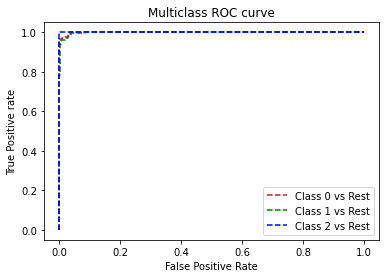

In [17]:
# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_tp=[];
model_tn=[];
model_fp=[];
model_fn=[];
model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    model_tp.append(tp);
    model_tn.append(tn);
    model_fp.append(fp);
    model_fn.append(fn);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

# Decision Tree Classifier

[[2634    0    0]
 [   0  102    0]
 [   0    0    5]]
Print Class: 0
TP=2634, FN=0, TN=107, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=102, FN=0, TN=2639, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=5, FN=0, TN=2736, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

roc_auc_score: 1.0


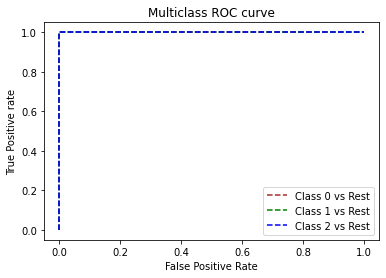

In [18]:
# To build the 'Multi Label Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

ModelDT = DecisionTreeClassifier()

# Train the model with training data

ModelDT = ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_tp=[];
model_tn=[];
model_fp=[];
model_fn=[];
model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    model_tp.append(tp);
    model_tn.append(tn);
    model_fp.append(fp);
    model_fn.append(fn);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting 

plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

# Random Forest classifier

[[2633    0    0]
 [   1  102    5]
 [   0    0    0]]
Print Class: 0
TP=2633, FN=0, TN=107, FP=1
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 0.991
Balanced Accuracy: 0.996
MCC: 0.995

Print Class: 1
TP=102, FN=6, TN=2633, FP=0
Accuracy: 0.998
Precision: 1.0
Sensitivity: 0.944
F1-Score: 0.971
Specificity: 1.0
Balanced Accuracy: 0.972
MCC: 0.971

Print Class: 2
TP=0, FN=0, TN=2736, FP=5
Accuracy: 0.998
Precision: 0.0
Sensitivity: nan
F1-Score: 0.0
Specificity: 0.998
Balanced Accuracy: nan
MCC: nan

Overall Performance Prediction:
Accuracy: 99.8667%
Precision: 66.6667%
Recall or Sensitivity: nan%
F1-Score: 0.657
Specificity or True Nagative Rate: 99.6333%
Balanced Accuracy: nan%

MCC: nan

roc_auc_score: 1.0


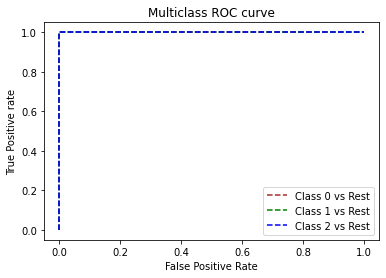

In [19]:
# To build the 'Random Forest' model

from sklearn.ensemble import RandomForestClassifier

# Creat model object

ModelRF = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=30, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)
# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_tp=[];
model_tn=[];
model_fp=[];
model_fn=[];
model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    model_tp.append(tp);
    model_tn.append(tn);
    model_fp.append(fp);
    model_fn.append(fn);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting 

plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

# Extra Tree Classifier

[[2629   16    0]
 [   5   86    4]
 [   0    0    1]]
Print Class: 0
TP=2629, FN=16, TN=91, FP=5
Accuracy: 0.992
Precision: 0.998
Sensitivity: 0.994
F1-Score: 0.996
Specificity: 0.948
Balanced Accuracy: 0.971
MCC: 0.894

Print Class: 1
TP=86, FN=9, TN=2630, FP=16
Accuracy: 0.991
Precision: 0.843
Sensitivity: 0.905
F1-Score: 0.873
Specificity: 0.994
Balanced Accuracy: 0.95
MCC: 0.869

Print Class: 2
TP=1, FN=0, TN=2736, FP=4
Accuracy: 0.999
Precision: 0.2
Sensitivity: 1.0
F1-Score: 0.333
Specificity: 0.999
Balanced Accuracy: 1.0
MCC: 0.447

Overall Performance Prediction:
Accuracy: 99.4%
Precision: 68.0333%
Recall or Sensitivity: 96.6333%
F1-Score: 0.734
Specificity or True Nagative Rate: 98.0333%
Balanced Accuracy: 97.3667%

MCC: 0.7367

roc_auc_score: 0.997


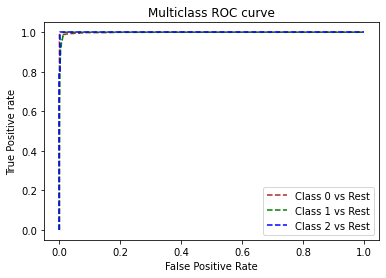

In [20]:
# To build the 'ExtraTreesClassifier' model


from sklearn.ensemble import ExtraTreesClassifier

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)


# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_tp=[];
model_tn=[];
model_fp=[];
model_fn=[];
model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    model_tp.append(tp);
    model_tn.append(tn);
    model_fp.append(fp);
    model_fn.append(fn);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))

# KNN

In [21]:
# Load the results dataset

KNNResults = pd.read_csv(r"D:\Internship\Datasets\EMResults.csv", header=0)

# Display the first 5 records

KNNResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
[[2634    0    0]
 [   0  102    0]
 [   0    0    5]]
Print Class: 0
TP=2634, FN=0, TN=107, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=102, FN=0, TN=2639, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=5, FN=0, TN=2736, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 1.0

ROC AUC Score: 1.0
-----------------------------------------------------------------------------------------------------
KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
[[2634    0    0]
 [   0  102    0]
 [   0   

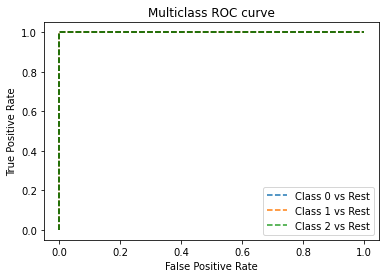

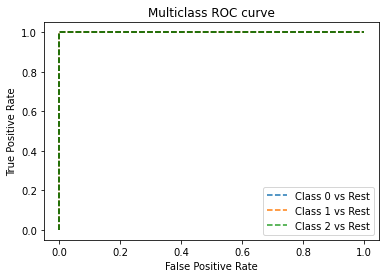

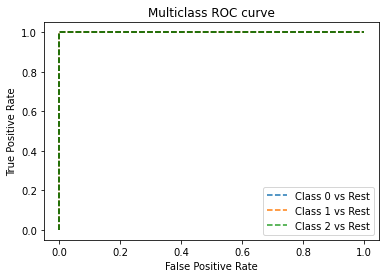

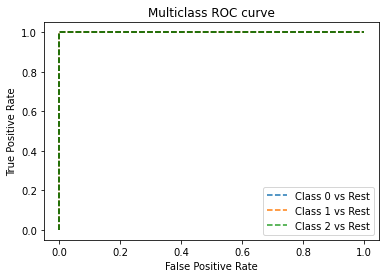

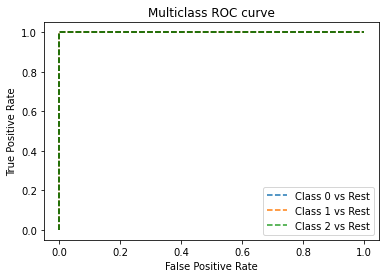

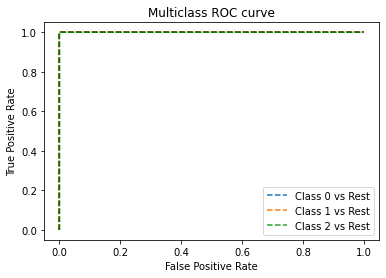

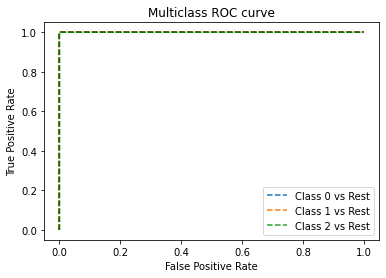

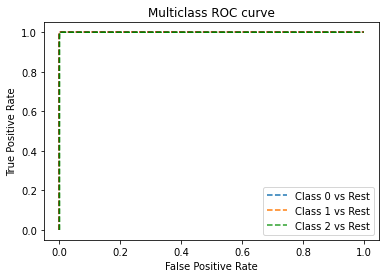

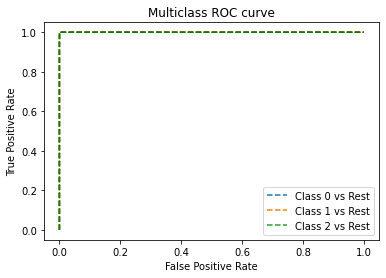

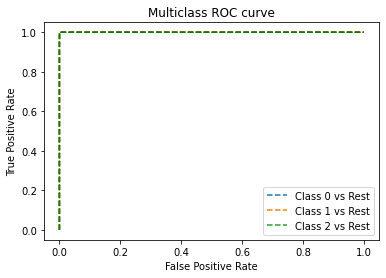

In [22]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 11, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
   # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0,1,2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_tp=[];
    model_tn=[];
    model_fp=[];
    model_fn=[];
    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
        model_tp.append(tp);
        model_tn.append(tn);
        model_fp.append(fp);
        model_fn.append(fn);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
    # OVERALL - FINAL PREDICTION PERFORMANCE
   
    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))
    
    # ROC curve for Multi classes 

    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 3
            
    label_curves = {}

    plt.figure()
    for i in range(0, n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:, i-1], pos_label=i-1)
        label_curves[i] = (fpr[i], tpr[i])

    for label, (fpr_label, tpr_label) in label_curves.items():
        plt.plot(fpr_label, tpr_label, linestyle='--', label='Class {} vs Rest'.format(label))

    # Set title and labels for the ROC curve plot

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='pink', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='brown', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
    
    # Compute and print ROC AUC score
    
    roc_auc = roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted')
    print('ROC AUC Score:', round(roc_auc, 3))
    
    
    print('-----------------------------------------------------------------------------------------------------')
       #---
    new_row = {'Model Name' : ModelKNN,
               'True_Positive' : round(sum(model_tp),2), 
               'False_Negative' : round(sum(model_fn),2), 
               'False_Positive' : round(sum(model_fp),2),
               'True_Negative' : round(sum(model_tn),2),
               'Accuracy' : round(mean(model_acc)*100, 4),
               'Precision' : round(mean(model_prec)*100, 4),
               'Recall' : round(mean(model_recall)*100, 4),
               'F1 Score' : round(mean(model_fscore), 4),
               'Specificity' : round(mean(model_spec)*100, 4),
               'MCC':round(mean(model_mcc), 4),
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted'),
               'Balanced Accuracy':round(mean(model_bal_acc)*100, 4)}
    KNNResults = KNNResults.append(new_row, ignore_index=True)
        #---


In [23]:
KNNResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),2741,0,0,5482,100.0,100.0,100.0000,1.0000,100.0,1.0000,1.000000,100.0
1,KNeighborsClassifier(n_neighbors=2),2741,0,0,5482,100.0,100.0,100.0000,1.0000,100.0,1.0000,1.000000,100.0
2,KNeighborsClassifier(n_neighbors=3),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
3,KNeighborsClassifier(n_neighbors=4),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
4,KNeighborsClassifier(),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
5,KNeighborsClassifier(n_neighbors=6),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
6,KNeighborsClassifier(n_neighbors=7),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
7,KNeighborsClassifier(n_neighbors=8),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,1.000000,99.7
8,KNeighborsClassifier(n_neighbors=9),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,0.999998,99.7
9,KNeighborsClassifier(n_neighbors=10),2740,1,1,5481,100.0,100.0,99.6667,0.9983,99.7,0.9967,0.999998,99.7


# SVM

In [24]:
# Load the results dataset

SVMResults = pd.read_csv(r"D:\Internship\Datasets\EMResults.csv", header=0)

# Display the first 5 records

SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVC(kernel='linear', probability=True)
[[2634    0    0]
 [   0  102    0]
 [   0    0    5]]
Print Class: 0
TP=2634, FN=0, TN=107, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 1
TP=102, FN=0, TN=2639, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Print Class: 2
TP=5, FN=0, TN=2736, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 1.0

Overall Performance Prediction:
Accuracy: 100.0%
Precision: 100.0%
Recall or Sensitivity: 100.0%
F1-Score: 1.0
Specificity or True Nagative Rate: 100.0%
Balanced Accuracy: 100.0%

MCC: 0.9983

ROC AUC Score: 1.0
-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
[[2633    0    0]
 [   1  102    0]
 [   0    0    5]]
Print C

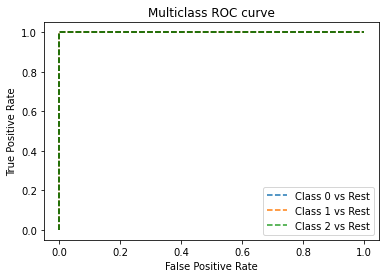

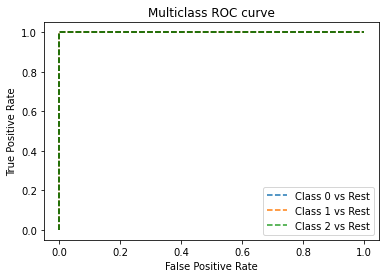

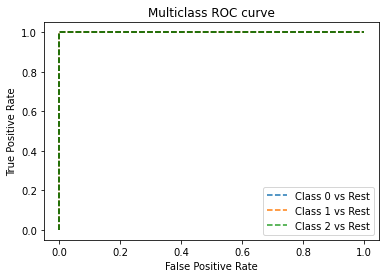

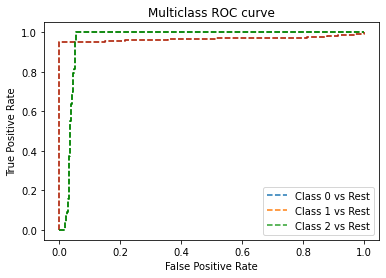

In [25]:
# Build the all types of SVM Calssification models and compare the results

from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

SVMLIN = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
             probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
             max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

SVMPLY = SVC(kernel='poly', degree=2, probability=True)

SVMGSN = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

SVMSIG = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [SVMLIN, SVMPLY, SVMGSN, SVMSIG]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt
    from statistics import mean
    import math
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score


    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob
    
    # Class = Label 0-2

    lst_classes = [0,1,2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_tp=[];
    model_tn=[];
    model_fp=[];
    model_fn=[];
    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    modell_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
        model_tp.append(tp);
        model_tn.append(tn);
        model_fp.append(fp);
        model_fn.append(fn);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
    # OVERALL - FINAL PREDICTION PERFORMANCE
    
    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

    # ROC curve for Multi classes 

    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 3
            
    label_curves = {}

    plt.figure()
    for i in range(0, n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:, i-1], pos_label=i-1)
        label_curves[i] = (fpr[i], tpr[i])

    for label, (fpr_label, tpr_label) in label_curves.items():
        plt.plot(fpr_label, tpr_label, linestyle='--', label='Class {} vs Rest'.format(label))

    # Set title and labels for the ROC curve plot

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')

    plt.plot(fpr[0], tpr[0], linestyle='--',color='pink', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='brown', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
    
    # Compute and print ROC AUC score
    
    roc_auc = roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted')
    print('ROC AUC Score:', round(roc_auc, 3))
    
    
    print('-----------------------------------------------------------------------------------------------------')

    new_row = {'Model Name' : models,
               'True_Positive' : round(sum(model_tp),2), 
               'False_Negative' : round(sum(model_fn),2), 
               'False_Positive' : round(sum(model_fp),2),
               'True_Negative' : round(sum(model_tn),2),
               'Accuracy' : round(mean(model_acc)*100, 4),
               'Precision' : round(mean(model_prec)*100, 4),
               'Recall' : round(mean(model_recall)*100, 4),
               'F1 Score' : round(mean(model_fscore), 4),
               'Specificity' : round(mean(model_spec)*100, 4),
               'MCC':round(mean(model_mcc), 4),
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted'),
               'Balanced Accuracy':round(mean(model_bal_acc)*100, 4)}
    SVMResults = SVMResults.append(new_row, ignore_index=True)

In [26]:
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"SVC(kernel='linear', probability=True)",2741,0,0,5482,100.0,100.0000,100.0000,1.0000,100.0000,0.9983,1.000000,100.0000
1,"SVC(degree=2, kernel='poly', probability=True)",2740,1,1,5481,100.0,100.0000,99.6667,0.9983,99.7000,0.9978,1.000000,99.7000
2,"SVC(class_weight='balanced', probability=True,...",2716,25,25,5457,99.4,99.3667,88.0333,0.9313,93.9000,0.9736,1.000000,90.9333
3,"SVC(class_weight='balanced', kernel='sigmoid',...",32,2709,2709,2773,34.1,1.0333,11.5667,0.0187,64.3667,0.7116,0.966231,38.0000


# Naive Bayes 

[[2473    2    0]
 [ 161   96    0]
 [   0    4    5]]
Print Class: 0
TP=2473, FN=2, TN=105, FP=161
Accuracy: 0.941
Precision: 0.939
Sensitivity: 0.999
F1-Score: 0.968
Specificity: 0.395
Balanced Accuracy: 0.697
MCC: 0.602

Print Class: 1
TP=96, FN=161, TN=2478, FP=6
Accuracy: 0.939
Precision: 0.941
Sensitivity: 0.374
F1-Score: 0.535
Specificity: 0.998
Balanced Accuracy: 0.686
MCC: 0.572

Print Class: 2
TP=5, FN=4, TN=2732, FP=0
Accuracy: 0.999
Precision: 1.0
Sensitivity: 0.556
F1-Score: 0.714
Specificity: 1.0
Balanced Accuracy: 0.778
MCC: 0.745

Overall Performance Prediction:
Accuracy: 95.9667%
Precision: 96.0%
Recall or Sensitivity: 64.3%
F1-Score: 0.739
Specificity or True Nagative Rate: 79.7667%
Balanced Accuracy: 72.0333%

MCC: 0.6397

roc_auc_score: 0.985


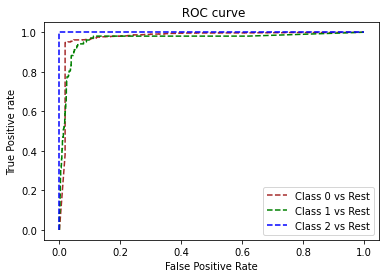

In [27]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

ModelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

ModelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelGNB.predict(x_test)
y_pred_prob = ModelGNB.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0,1,2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_tp=[];
model_tn=[];
model_fp=[];
model_fn=[];
model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    model_tp.append(tp);
    model_tn.append(tn);
    model_fp.append(fp);
    model_fn.append(fn);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy)); # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title(' ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))

# Comparing the Algorithms

In [28]:
# Load the results dataset

EMResults = pd.read_csv(r"D:\Internship\Datasets\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Print Class: 0
TP=2628, FN=7, TN=100, FP=6
Accuracy: 0.995
Precision: 0.998
Sensitivity: 0.997
F1-Score: 0.998
Specificity: 0.943
Balanced Accuracy: 0.97
MCC: 0.937

Print Class: 1
TP=95, FN=7, TN=2632, FP=7
Accuracy: 0.995
Precision: 0.931
Sensitivity: 0.931
F1-Score: 0.931
Specificity: 0.997
Balanced Accuracy: 0.964
MCC: 0.929

Print Class: 2
TP=4, FN=0, TN=2736, FP=1
Accuracy: 1.0
Precision: 0.8
Sensitivity: 1.0
F1-Score: 0.889
Specificity: 1.0
Balanced Accuracy: 1.0
MCC: 0.894

Overall Performance Prediction:
Accuracy: 99.6667%
Precision: 90.9667%
Recall or Sensitivity: 97.6%
F1-Score: 0.9393
Specificity or True Nagative Rate: 98.0%
Balanced Accuracy: 97.8%

MCC: 0.92

ROC AUC Score: 0.999
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Print Class: 0
TP=2634, FN=0, TN=107, FP=0
Accuracy: 1.0
Precision: 1.0
Sensitivity: 1.0
F1-Score: 1.0
Specificity: 1.0
Bal

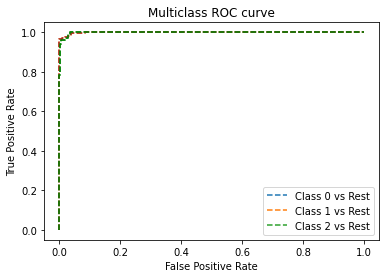

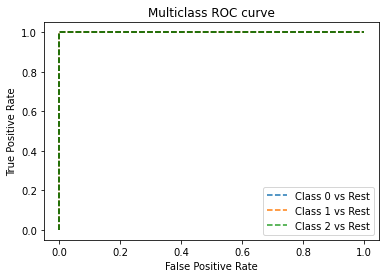

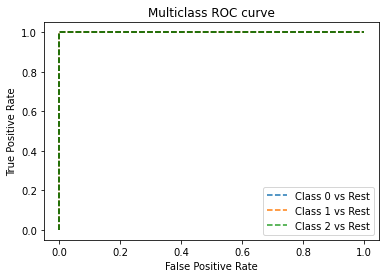

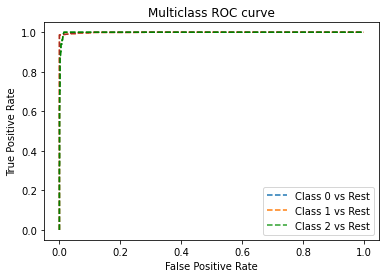

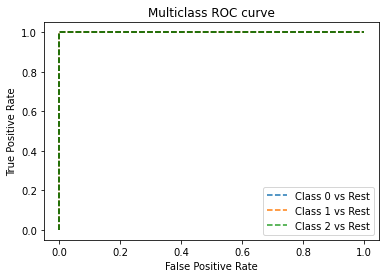

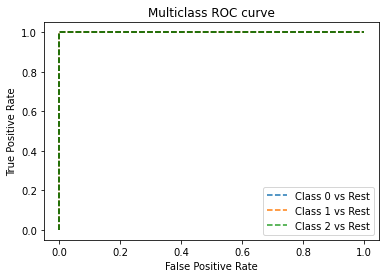

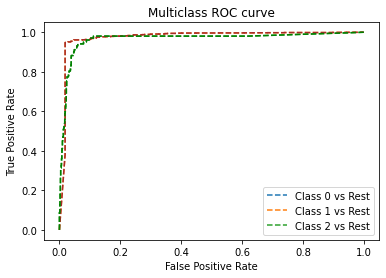

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create an object for model

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=30, min_samples_split=2,
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)
ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='poly', degree=2, probability=True)

# Evalution matrix for all the algorithmsModelSVM,
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM,ModelGNB]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    # Actual and predicted classes
    
    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-2

    lst_classes = [0, 1, 2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]
    
        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);
        model_tp.append(tp);
        model_tn.append(tn);
        model_fp.append(fp);
        model_fn.append(fn);
    
        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
        
    # OVERALL - FINAL PREDICTION PERFORMANCE
       
    # importing mean()

    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

        
    # ROC curve for Multi classes 

    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}
    n_class = 3
            
    label_curves = {}

    plt.figure()
    for i in range(0, n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:, i-1], pos_label=i-1)
        label_curves[i] = (fpr[i], tpr[i])

    for label, (fpr_label, tpr_label) in label_curves.items():
        plt.plot(fpr_label, tpr_label, linestyle='--', label='Class {} vs Rest'.format(label))

    # Set title and labels for the ROC curve plot

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.plot(fpr[0], tpr[0], linestyle='--',color='pink', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='brown', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Class 2 vs Rest')
    
    # Compute and print ROC AUC score
    
    roc_auc = roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted')
    print('ROC AUC Score:', round(roc_auc, 3))
    
    print('-----------------------------------------------------------------------------------------------------')

    new_row = {'Model Name' : models,
               'True_Positive' : round(sum(model_tp),2), 
               'False_Negative' : round(sum(model_fn),2), 
               'False_Positive' : round(sum(model_fp),2),
               'True_Negative' : round(sum(model_tn),2),
               'Accuracy' : round(mean(model_acc)*100, 4),
               'Precision' : round(mean(model_prec)*100, 4),
               'Recall' : round(mean(model_recall)*100, 4),
               'F1 Score' : round(mean(model_fscore), 4),
               'Specificity' : round(mean(model_spec)*100, 4),
               'MCC':round(mean(model_mcc), 4),
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovr', average='weighted'),
               'Balanced Accuracy':round(mean(model_bal_acc)*100, 4)}
    EMResults = EMResults.append(new_row, ignore_index=True)

In [30]:
# Results with comparing the all the algorithms 

EMResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),5301,181,181,10783,99.6667,90.9667,97.6000,0.9393,98.0000,0.9200,0.998811,97.8000
1,DecisionTreeClassifier(),8042,181,181,16265,100.0000,100.0000,100.0000,1.0000,100.0000,1.0000,1.000000,100.0000
2,"(DecisionTreeClassifier(max_depth=30, max_feat...",10778,186,186,21742,99.9000,73.3333,98.4333,0.7697,99.6667,0.8057,1.000000,99.0667
3,"(ExtraTreeClassifier(random_state=406675821), ...",13501,204,204,27206,99.5667,69.3667,97.7667,0.7463,99.1000,0.7610,0.999158,98.4333
4,KNeighborsClassifier(),16241,205,205,32687,100.0000,100.0000,99.6667,0.9983,99.7000,0.9967,1.000000,99.7000
5,"SVC(degree=2, kernel='poly', probability=True)",18981,206,206,38168,100.0000,100.0000,99.6667,0.9983,99.7000,0.9967,1.000000,99.7000
6,GaussianNB(),21555,373,373,43483,95.9667,96.0000,64.3000,0.7390,79.7667,0.6397,0.975176,72.0333


In [31]:
# Predict the values with Decision Tree algorithm

y_predDC = ModelDC.predict(x_test)

In [32]:
Results = pd.DataFrame({'TCA_A':y_test, 'TCA_P':y_predDC})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = AI_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,TCA_A,TCA_P
7106,NG62780,Oregon,4250.282624,Yes,Basic,High School or Below,1/18/11,Unemployed,F,0,Suburban,Single,61,17,1,1,7,Personal Auto,Personal L2,Offer1,Agent,292.800000,Four-Door Car,Small,0,0
3834,JG61793,Washington,3046.248976,No,Extended,High School or Below,1/18/11,Unemployed,M,0,Suburban,Single,98,4,43,2,1,Personal Auto,Personal L1,Offer1,Branch,705.600000,Four-Door Car,Small,0,0
6839,VI66860,Nevada,3554.845264,Yes,Extended,Master,10/1/2011,Employed,F,58557,Rural,Married,88,4,83,0,1,Corporate Auto,Corporate L3,Offer1,Branch,55.510526,Four-Door Car,Large,0,0
7370,MT91532,California,7326.544855,No,Extended,Bachelor,12/2/2011,Employed,M,62338,Rural,Married,92,9,61,0,4,Corporate Auto,Corporate L1,Offer1,Agent,4.216231,Four-Door Car,Medsize,0,0
1188,ZB50601,Nevada,5161.789881,No,Basic,College,10/2/2011,Unemployed,M,0,Suburban,Married,70,6,24,0,6,Personal Auto,Personal L3,Offer1,Web,469.491537,Four-Door Car,Medsize,0,0
